In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [77]:
##设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# 读取Excel文件
file_path = 'D:\\py\\530\\data\\Lab2_granite_compression.xlsx'  # 替换为你的Excel文件路径
sheet_name = 'Sheet2'  # 替换为你的工作表名称
data = pd.read_excel(file_path, sheet_name=sheet_name)

# 提取数据
strain = data["应力"]
axial_strain = data["横向应变"]
lateral_strain = data["轴向应变"]
num_of_ae_events = data["累计数"]
max(strain)

164.45796

In [86]:
from scipy.stats import linregress
from sympy import *

# 只考虑线性部分的数据点
linear_strain = lateral_strain[437:531]
linear_stress = strain[437:531]

slope, intercept, r_value, p_value, std_err = linregress(linear_strain, linear_stress)
E = slope * 1e-1  # 转换为 GPa
r_squared = r_value**2


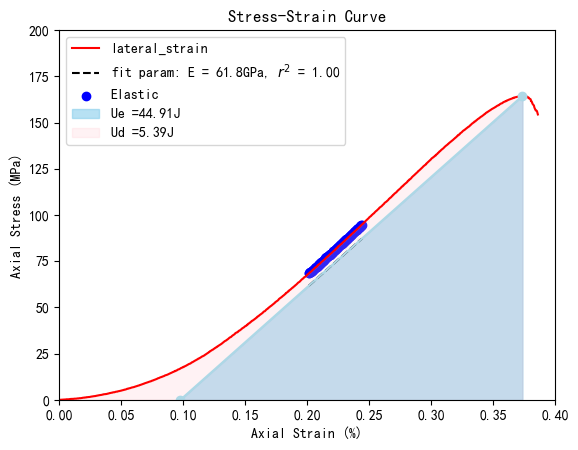

In [126]:
# 创建图形
fig, ax1 = plt.subplots()

# 绘制应力-应变曲线
ax1.plot( lateral_strain,strain, label='lateral_strain', color='red')
ax1.set_xlim(0,0.4)
ax1.set_ylim(0, 200)
ax1.legend(loc='upper right')

# 绘制拟合线
plt.plot(linear_strain, slope * linear_strain + intercept, 'k--', label=f'fit param: E = {E:.1f}GPa, $r^2$ = {r_squared:.2f}')

# 添加数据点
plt.scatter(linear_strain, linear_stress, color='b', label='Elastic')

# 定义两点坐标
point1 = (0.09774, 0)
point2 = (0.37358, 164.45796)

# 绘制连接线
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 
         marker='o', color='lightblue', linestyle='-')

# 填充区域
plt.fill_between(
    x=[point1[0], point2[0]], 
    y1=[point1[1], point2[1]], 
    color='skyblue', 
    alpha=0.6,
    label='Ue =44.91J '
)
plt.fill_between(lateral_strain,strain,where = (lateral_strain <= 0.37358),color='pink',alpha=0.2,label='Ud =5.39J ')
# 添加标签和标题
plt.xlabel('Axial Strain (%)')
plt.ylabel('Axial Stress (MPa)')
plt.title('Stress-Strain Curve')
plt.legend()

# 显示图形
plt.show()